In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,ConfusionMatrixDisplay,f1_score,recall_score
df = pd.read_csv('/content/cancer patient data sets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
df.tail()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
999,999,P999,47,1,6,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High


In [ ]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
print(df.shape)
df.dtypes

(1000, 26)


index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [ ]:
dropdata= df.drop(['index','Patient Id', 'Level'], axis=1)
dropdata.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


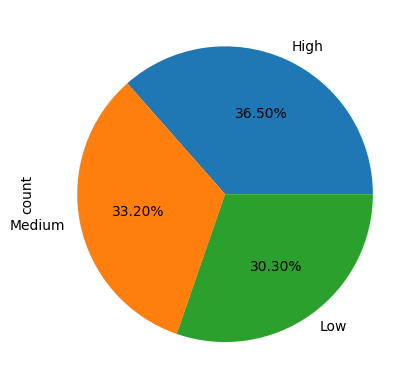

In [ ]:
category_counts=df['Level'].value_counts()
category_counts.plot.pie(autopct='%0.2f%%')
plt.show()

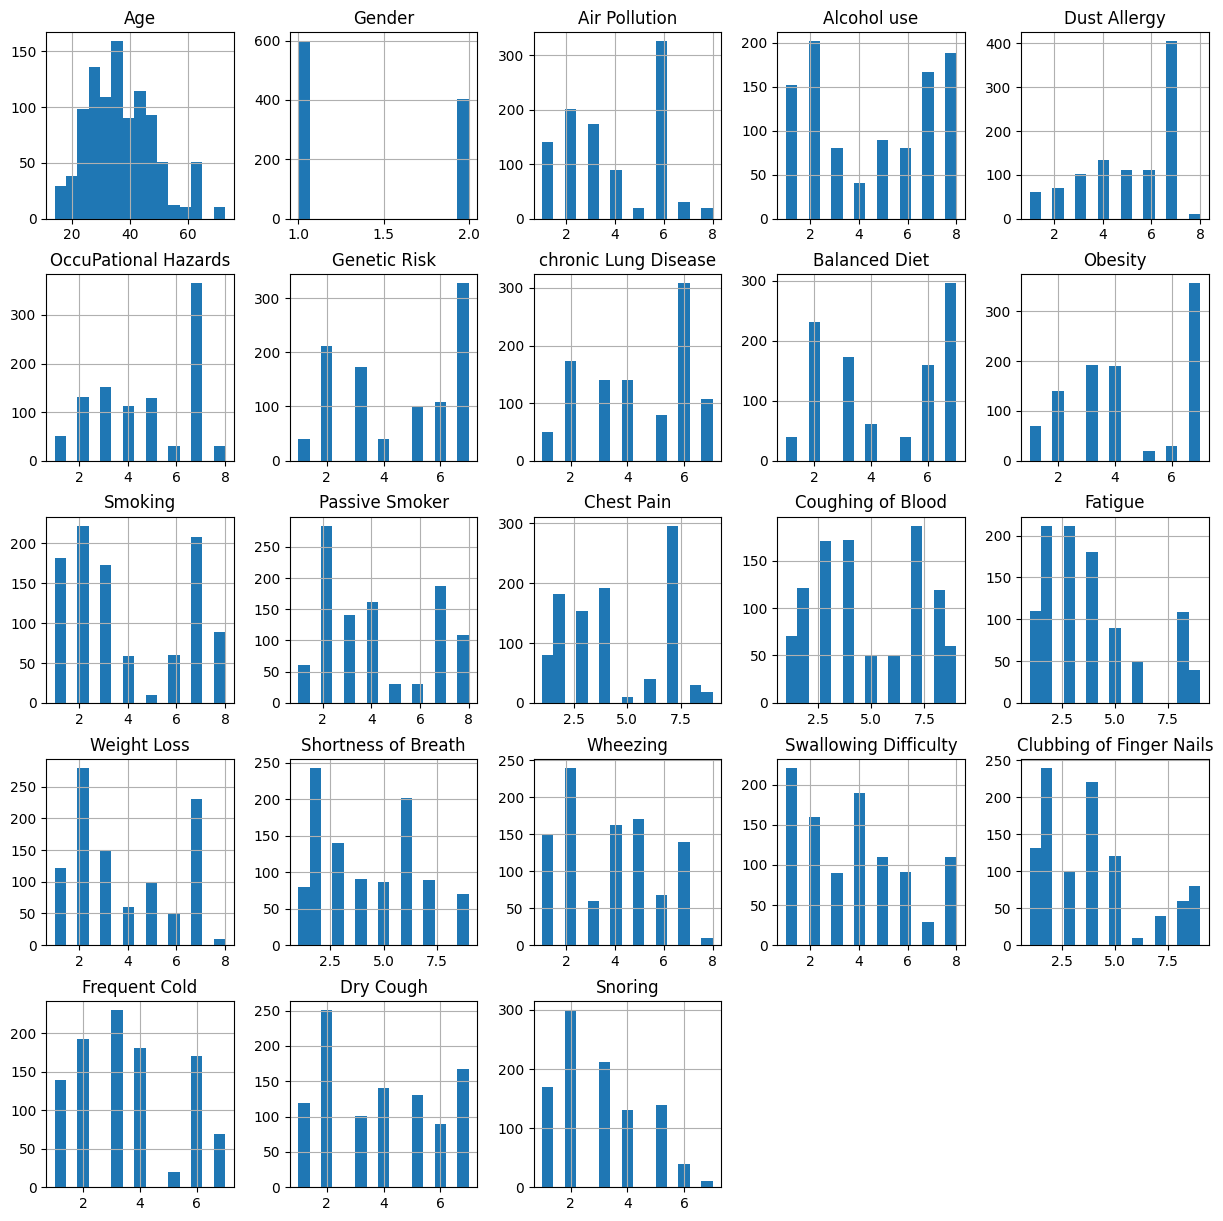

In [ ]:
dropdata.hist(figsize=(15,15), bins=15)
plt.show()

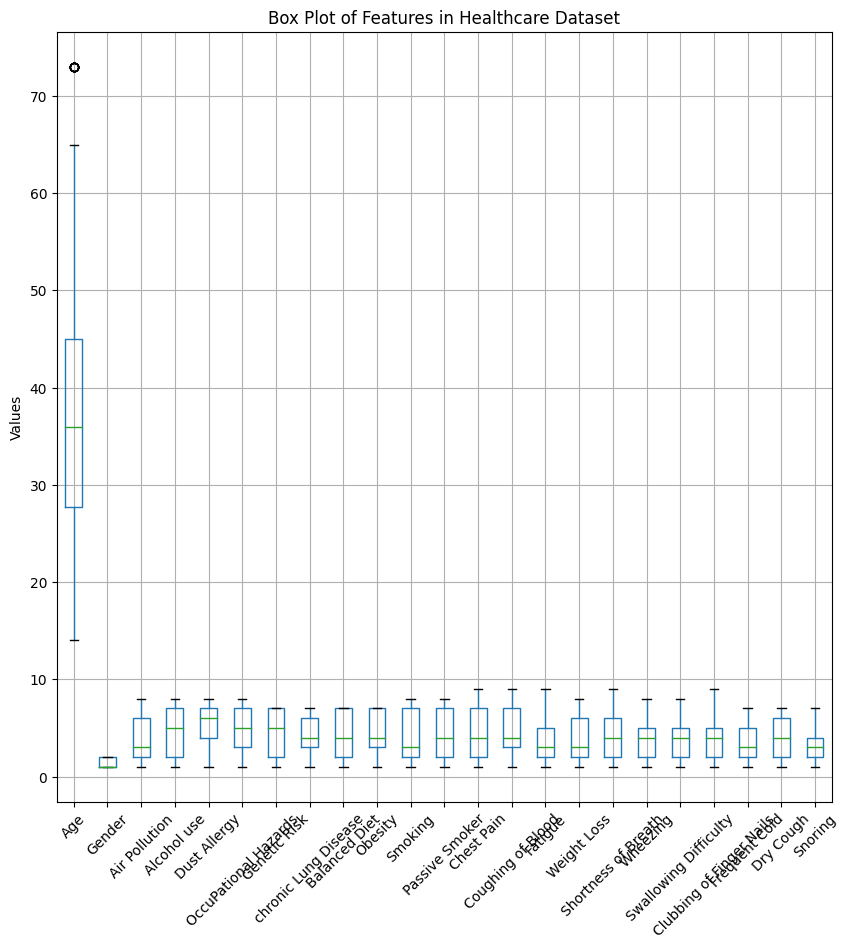

In [ ]:
plt.figure(figsize=(10, 10))
dropdata.boxplot(rot=45)
plt.title("Box Plot of Features in Healthcare Dataset")
plt.ylabel("Values")
plt.show()

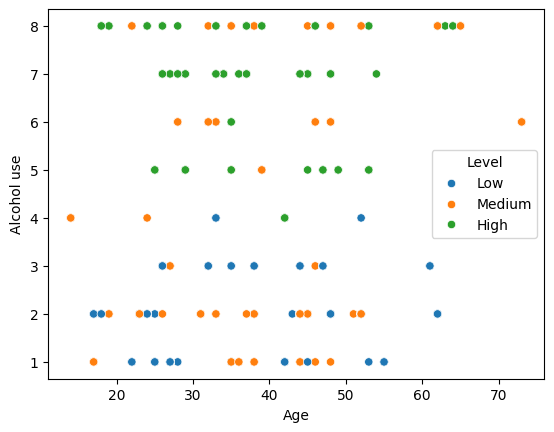

In [ ]:
sns.scatterplot(x="Age", y="Alcohol use", hue="Level", data=df)
plt.show()

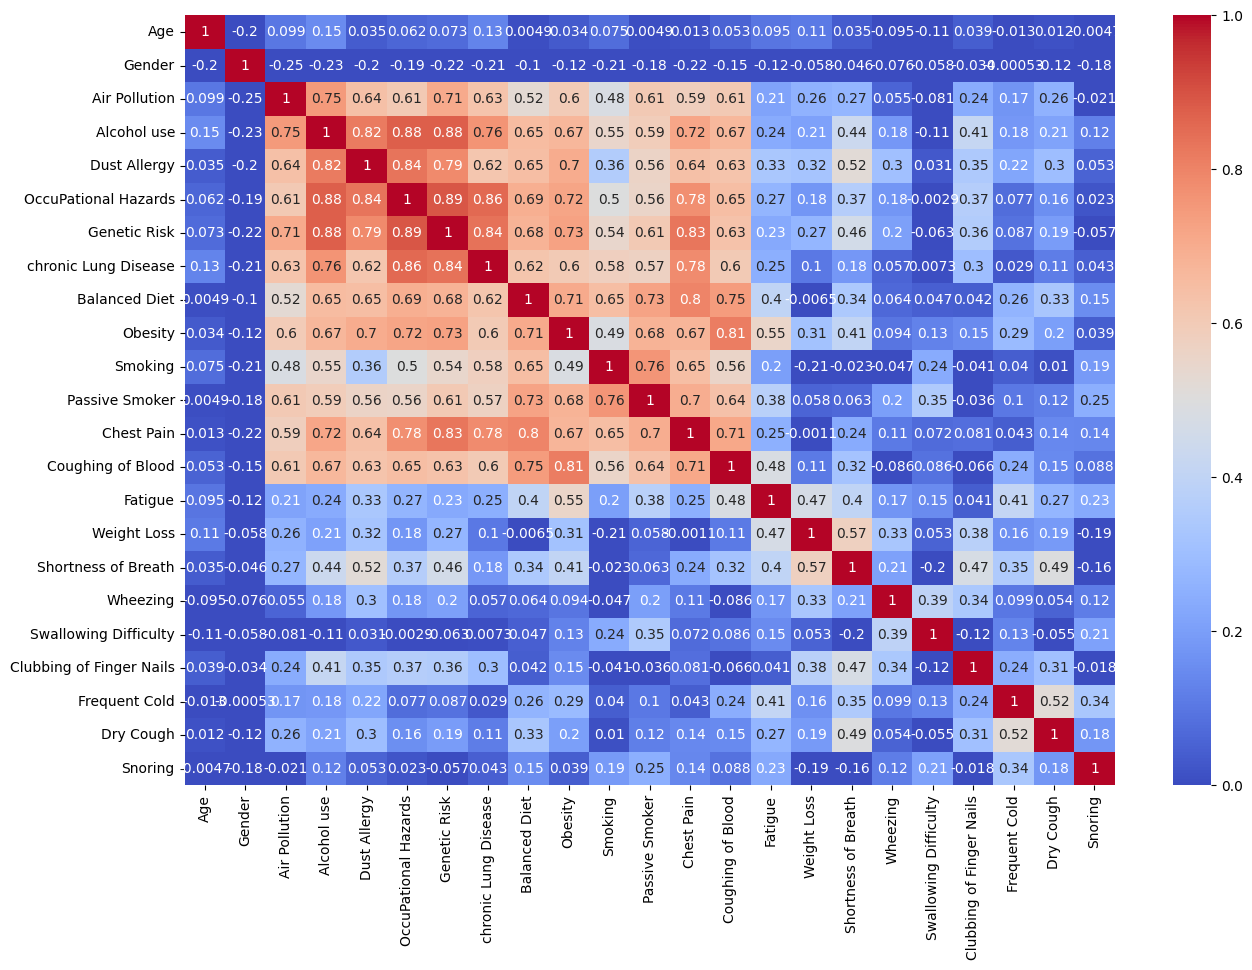

In [ ]:
corr=dropdata.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, vmin=0, vmax=1, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Level'] = label_encoder.fit_transform(df['Level'])
print("Mapping of original values to encoded values:")
for original, encoded in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(original, "-->", encoded)

Mapping of original values to encoded values:
High --> 0
Low --> 1
Medium --> 2


In [ ]:
X=df[['Age','Gender','Air Pollution','Alcohol use','Dust Allergy','chronic Lung Disease','Obesity','Smoking','Chest Pain','Coughing of Blood','Weight Loss','Shortness of Breath','Wheezing','Frequent Cold','Dry Cough']]
y=df['Level']

In [ ]:
X

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,chronic Lung Disease,Obesity,Smoking,Chest Pain,Coughing of Blood,Weight Loss,Shortness of Breath,Wheezing,Frequent Cold,Dry Cough
0,33,1,2,4,5,2,4,3,2,4,4,2,2,2,3
1,17,1,3,1,5,2,2,2,2,3,3,7,8,1,7
2,35,1,4,5,6,4,7,2,4,8,7,9,2,6,7
3,37,1,7,7,7,7,7,7,7,8,2,3,1,6,7
4,46,1,6,8,7,6,7,8,7,9,2,4,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,6,7,7,7,7,3,2,7,4,5
996,37,2,6,8,7,6,7,7,7,7,6,5,7,3,1
997,25,2,4,5,6,4,7,2,4,8,7,9,2,6,7
998,18,2,6,8,7,6,7,8,7,9,2,4,1,4,2


In [ ]:
y

0      1
1      2
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Level, Length: 1000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,chronic Lung Disease,Obesity,Smoking,Chest Pain,Coughing of Blood,Weight Loss,Shortness of Breath,Wheezing,Frequent Cold,Dry Cough
29,28,2,1,6,7,2,2,3,2,2,3,7,7,7,7
535,53,1,6,8,7,7,3,8,9,6,2,5,2,1,7
695,28,2,1,6,7,2,2,3,2,2,3,7,7,7,7
557,62,1,6,8,7,6,4,1,4,3,7,6,5,3,4
836,38,1,2,3,5,1,1,4,2,4,1,3,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,33,1,6,7,7,7,7,7,7,7,5,7,6,7,6
270,24,2,1,2,2,4,3,2,1,1,1,1,2,5,2
860,36,2,2,1,5,3,4,1,2,4,7,2,5,3,2
435,49,1,6,5,6,4,7,2,4,8,7,9,2,6,7


In [ ]:
y_train

29     2
535    0
695    2
557    2
836    1
      ..
106    0
270    1
860    2
435    0
102    0
Name: Level, Length: 800, dtype: int64

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.76106299,  1.26722657, -1.40072639, ...,  1.6368661 ,
         1.89674735,  1.53255725],
       [ 1.3169247 , -0.78912487,  1.09499992, ..., -0.83761024,
        -1.35481954,  1.53255725],
       [-0.76106299,  1.26722657, -1.40072639, ...,  1.6368661 ,
         1.89674735,  1.53255725],
       ...,
       [-0.09610693,  1.26722657, -0.90158113, ...,  0.64707556,
        -0.27096391, -0.90879241],
       [ 0.98444667, -0.78912487,  1.09499992, ..., -0.83761024,
         1.35481954,  1.53255725],
       [ 0.98444667, -0.78912487,  1.09499992, ..., -0.83761024,
         1.35481954,  1.53255725]])

Accuracy: 0.95
Classification report of SVM is

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        82
           1       0.94      0.89      0.92        55
           2       0.91      0.94      0.92        63

    accuracy                           0.95       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.95      0.95       200



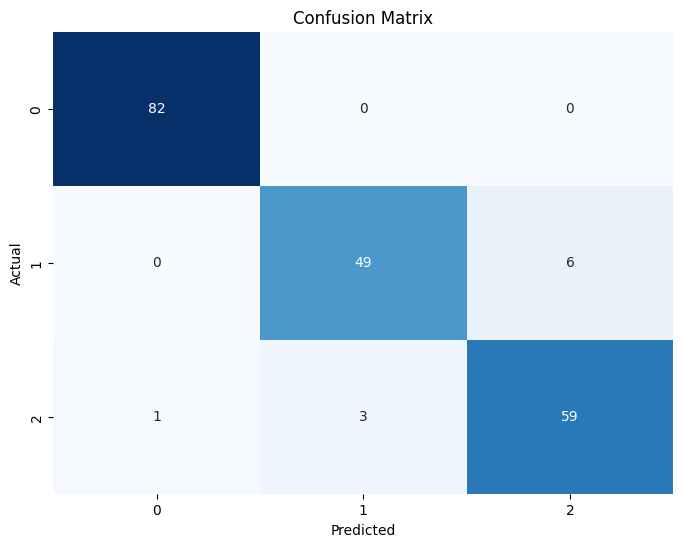

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,ConfusionMatrixDisplay,f1_score,recall_score,roc_curve, roc_auc_score
svc = svm.SVC(kernel='rbf')
svc.fit(X_train, y_train)
svc.score(X_train , y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test , svc_pred)
print("Accuracy:", svc_acc)
print('Classification report of SVM is\n')
print(classification_report(y_test , svc_pred))
cm = confusion_matrix(y_test, svc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

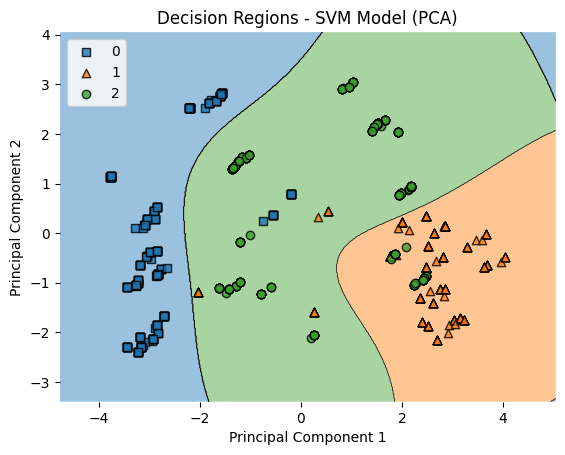

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
svc.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train.values, clf=svc, legend=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Regions - SVM Model (PCA)')
plt.legend(loc='upper left')
plt.show()

Accuracy: 0.95
Classification report of SVM is

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        82
           1       0.94      0.89      0.92        55
           2       0.94      0.94      0.94        63

    accuracy                           0.95       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.95      0.95       200



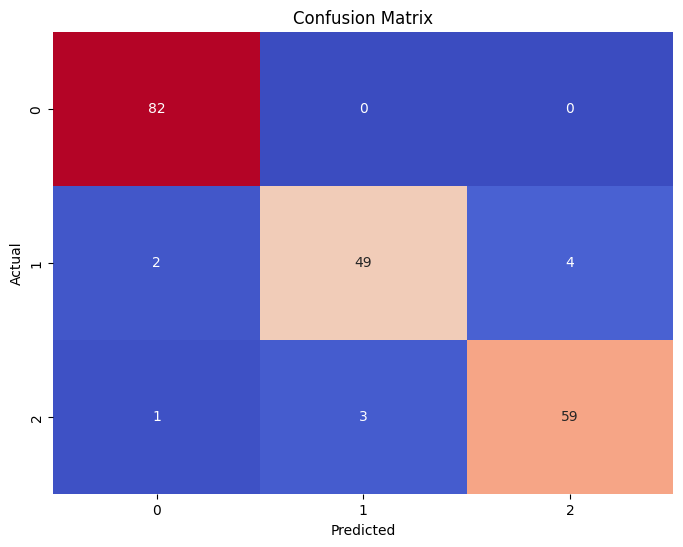

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,ConfusionMatrixDisplay,f1_score,recall_score
svc = svm.SVC(kernel='poly')
svc.fit(X_train, y_train)
svc.score(X_train , y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test , svc_pred)
print("Accuracy:", svc_acc)
print('Classification report of SVM is\n')
print(classification_report(y_test , svc_pred))
cm = confusion_matrix(y_test, svc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_lr_train_pred= lr.predict(X_train)
y_lr_test_pred=lr.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2= r2_score(y_train,y_lr_train_pred)
lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2= r2_score(y_test,y_lr_test_pred)
print('LR MSE (TRAIN):',lr_train_mse)
print('LR R2 (TRAIN):',lr_train_r2)
print('LR MSE (TEST):',lr_test_mse)
print('LR R2 (TEST):',lr_test_r2)
lr_results=pd.DataFrame(['Linear regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']

LR MSE (TRAIN): 0.2365211678896311
LR R2 (TRAIN): 0.6570634895710872
LR MSE (TEST): 0.18987923078697896
LR R2 (TEST): 0.734796283687309


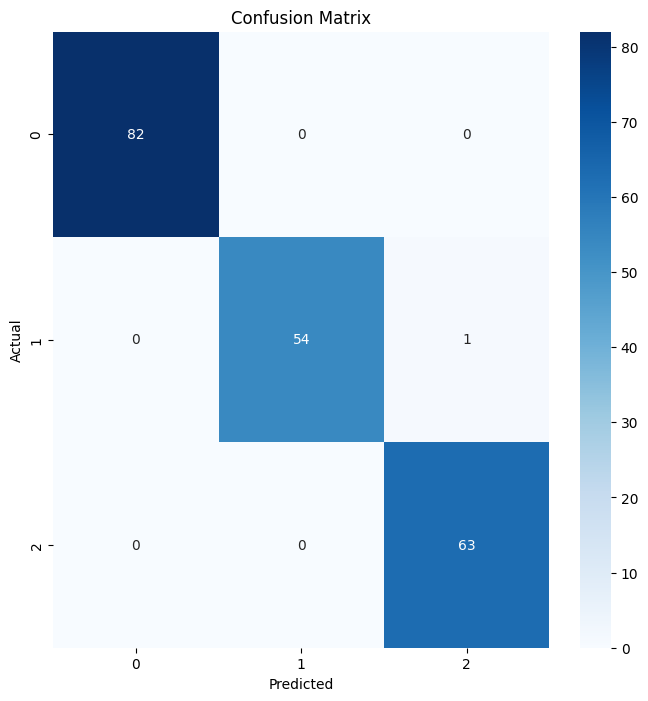

Classification report of KNN is

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      0.98      0.99        55
           2       0.98      1.00      0.99        63

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print the classification report
print('Classification report of KNN is\n')
print(classification_report(y_test, y_pred))


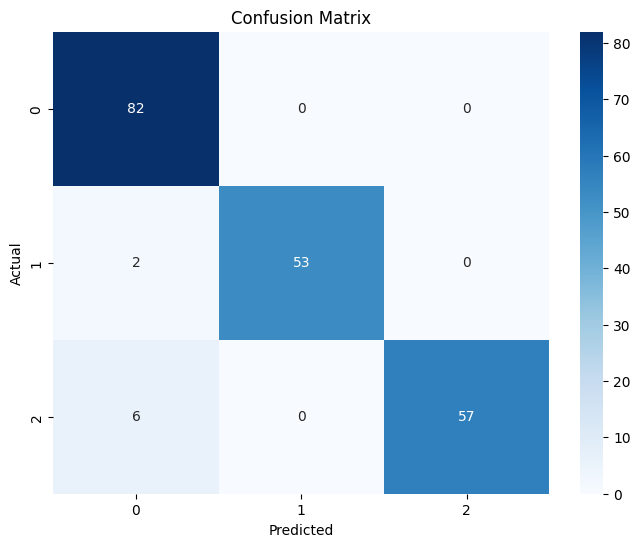

Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        82
           1       1.00      0.96      0.98        55
           2       1.00      0.90      0.95        63

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming your dataframe is already defined as df
# Defining feature columns and target variable
X = df[['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'chronic Lung Disease', 'Obesity', 'Smoking', 'Chest Pain', 'Coughing of Blood', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Frequent Cold', 'Dry Cough']]
y = df['Level']

# Binarize the output for multiclass ROC AUC calculation
y = label_binarize(y, classes=np.unique(y))
n_classes = y.shape[1]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression classifier within OneVsRestClassifier
logreg_classifier = OneVsRestClassifier(LogisticRegression(solver='liblinear', random_state=42))

# Fit the model to the training data
logreg_classifier.fit(X_train, y_train)

# Predict probabilities on the testing data
y_score = logreg_classifier.predict_proba(X_test)

# Predict on the testing data for confusion matrix and classification report
y_pred = logreg_classifier.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(df['Level']), yticklabels=np.unique(df['Level']))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))


Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        82
           1       0.84      0.89      0.87        55
           2       0.86      0.70      0.77        63

    accuracy                           0.86       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.86      0.86       200



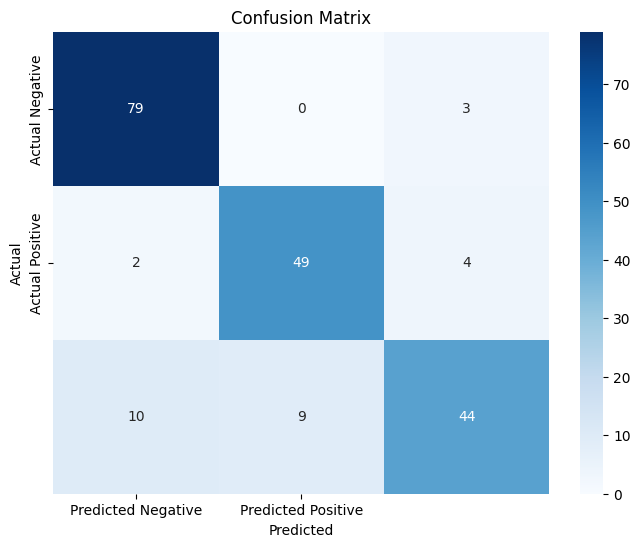

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the model to the training data
nb_classifier.fit(X_train, y_train)

# Predict probabilities on the testing data
y_proba = nb_classifier.predict_proba(X_test)[:, 1]

# Predict classes on the testing data
y_pred = nb_classifier.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

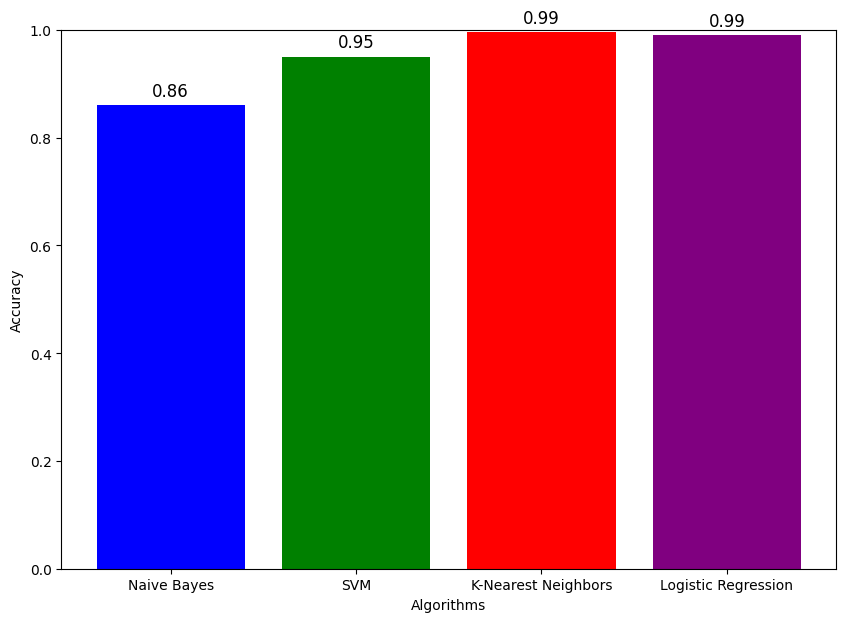

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming your dataframe is already defined as df
# Defining feature columns and target variable
X = df[['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'chronic Lung Disease', 'Obesity', 'Smoking', 'Chest Pain', 'Coughing of Blood', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Frequent Cold', 'Dry Cough']]
y = df['Level']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of classifiers
classifiers = {
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
}

# Dictionary to store the accuracy of each classifier
accuracy_dict = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[name] = accuracy

# Plotting the accuracies
plt.figure(figsize=(10, 7))
plt.bar(accuracy_dict.keys(), accuracy_dict.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')

plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
for i, v in enumerate(accuracy_dict.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=12)
plt.show()


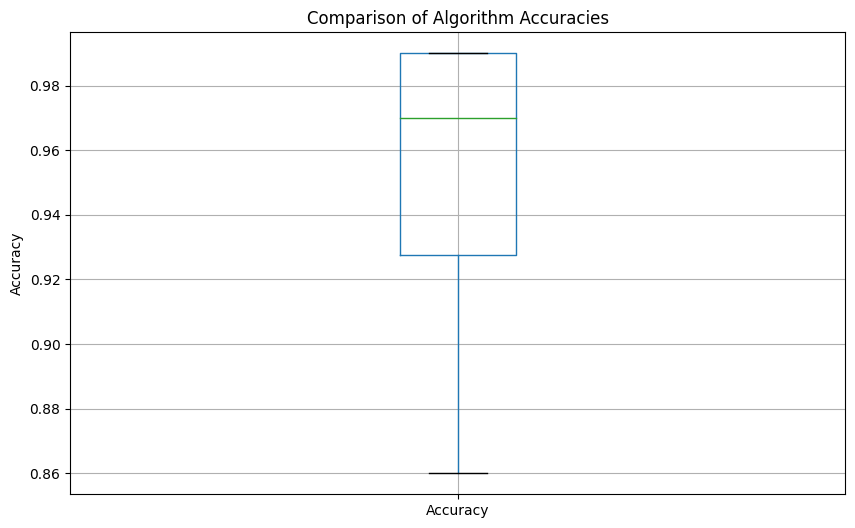

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Accuracy scores obtained from each algorithm
accuracy_scores = {
    'Naive Bayes': 0.86,
    'SVM': 0.95,
    'K-Nearest Neighbors': 0.99,
    'Logistic Regression': 0.99
}
# Create a DataFrame from the accuracy scores
df_accuracy = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy'])

# Create a box plot
plt.figure(figsize=(10, 6))
df_accuracy.boxplot()
plt.title('Comparison of Algorithm Accuracies')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


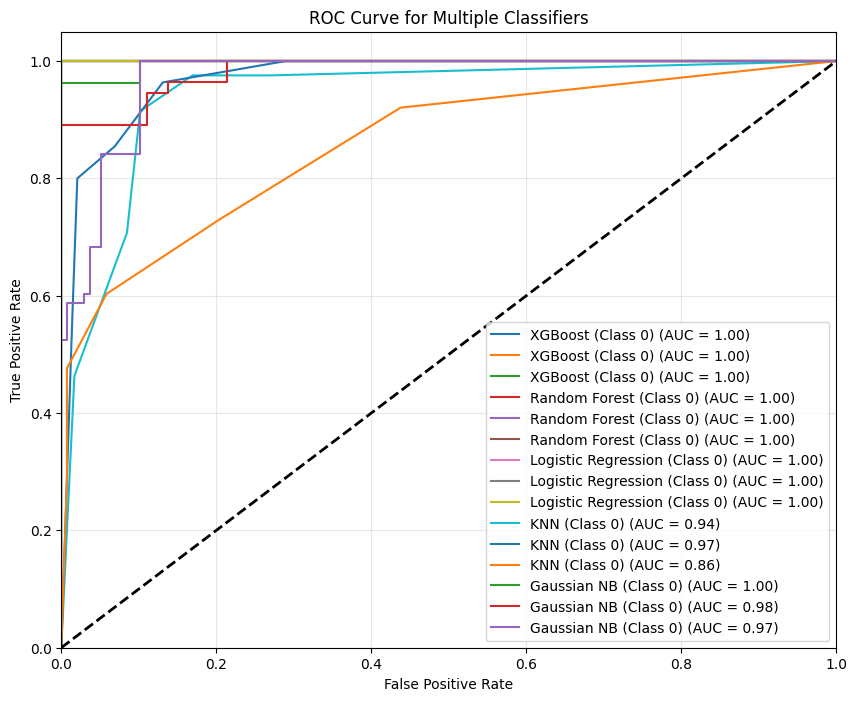

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Load your dataset
# Replace 'cancer patient data sets.csv' with the path to your dataset
data = pd.read_csv('cancer patient data sets.csv')

# Specify the target column
target_column = 'Level'

# Check for non-numeric columns and convert them using Label Encoding
non_numeric_cols = data.select_dtypes(include=['object']).columns

for col in non_numeric_cols:
    if col != target_column:  # Assuming 'Level' is the name of the target column
        data[col] = LabelEncoder().fit_transform(data[col])

# Split the data into features (X) and target (y)
X = data.drop(columns=[target_column])  # Drop the target column to get features
y = data[target_column]

# Encode the target variable if it's categorical
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Initialize the classifiers
classifiers = {
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'KNN': KNeighborsClassifier(),
    'Gaussian NB': GaussianNB()
}

plt.figure(figsize=(10, 8))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate through each classifier and plot ROC curve
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_proba = clf.predict_proba(X_test)

    n_classes = y_pred_proba.shape[1] if len(y_pred_proba.shape) > 1 else 2

    # Compute ROC curve for each class
    if n_classes > 2:
        y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{name} (Class {i}) (AUC = {roc_auc:.2f})')
    else:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the overall ROC curve
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiple Classifiers')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
import lime
import lime.lime_tabular
from sklearn.linear_model import LogisticRegression

# Assuming you want to use a simple LogisticRegression model
logreg_model = LogisticRegression()
logreg_model.fit(X, y)  # Fit the model to your data

# LIME has one explainer for all the models
explainer = lime.lime_tabular.LimeTabularExplainer(X.values, feature_names=X.columns.values.tolist(),
                                                  class_names=['lung cancer'], verbose=True, mode='classification')
# Choose the jth instance and use it to predict the results for that selection
j = 1
exp = explainer.explain_instance(X.values[j], logreg_model.predict_proba, num_features=5) # Use the fitted model
# Show the predictions
exp.show_in_notebook(show_table=True)

In [ ]:
clf_rf_5 = RandomForestClassifier()
clr_rf_5 = clf_rf_5.fit(X_train,Y_train)
importances = clr_rf_5.feature_importances_
# Use clr_rf_5 instead of clf
std = np.std([tree.feature_importances_ for tree in clr_rf_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
plt.figure(1, figsize=(5, 5))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()